# Filter the dataset based on event type and opening

In [105]:
import pandas as pd

df = pd.read_parquet('data/data_2025_01.parquet')
df.tail()

,game_id,event,white_elo,black_elo,opening,winner,moves
4991159,4999996,Rated Rapid game,1746,1736,Caro-Kann Defense,2,e2e4 c7c6 g1f3 d7d5 e4d5 c6d5 d2d4 c8g4 b1c3 g...
4991160,4999997,Rated Rapid game,1498,1476,King's Pawn Game: McConnell Defense,2,e2e4 e7e5 g1f3 d8f6 f1b5 f8c5 c2c3 c7c6 b5a4 b...
4991161,4999998,Rated Rapid game,2187,2128,Sicilian Defense: Modern Variations,2,e2e4 c7c5 g1f3 d7d6 f1c4 e7e6 e1g1 d8c7 c2c3 a...
4991162,4999999,Rated Rapid game,1659,1696,"Queen's Gambit Accepted: Central Variation, Al...",1,d2d4 d7d5 c2c4 d5c4 e2e4 g8f6 b1c3 e7e6 a2a3 f...
4991163,5000000,Rated Rapid game,1734,1706,Caro-Kann Defense: Main Line,1,d2d4 c7c6 e2e4 d7d5 b1c3 d5e4 c3e4 g8f6 e4c5 c...


## Filter events

In [106]:
df["event"].value_counts()

event
Rated Blitz game                                                  2112717
Rated Bullet game                                                 1673664
Rated Rapid game                                                   679202
Rated Classical game                                                28840
Rated UltraBullet game                                              22866
                                                                   ...   
Bullet swiss https://lichess.org/swiss/xOqHMgIz                         1
Rated Blitz tournament https://lichess.org/tournament/hdiBmgBr          1
Blitz swiss https://lichess.org/swiss/5HMPMS5d                          1
Rapid swiss https://lichess.org/swiss/sDVxlEAo                          1
Rated Rapid tournament https://lichess.org/tournament/MyE7RM5x          1
Name: count, Length: 2345, dtype: int64

In [107]:
events_to_keep = df["event"].value_counts().reset_index()["event"].head(4)
df_events = df[df["event"].isin(events_to_keep)]
df_events.head()

,game_id,event,white_elo,black_elo,opening,winner,moves
0,2,Rated Blitz game,1247,1218,Vienna Game: Anderssen Defense,1,b1c3 e7e5 e2e4 f8c5 d1h5 g8f6 h5e5 c5e7 d2d3 d...
1,3,Rated Blitz game,1577,1593,Caro-Kann Defense: Masi Variation,2,d2d4 c7c6 e2e4 g8f6 e4e5 f6g8 g1f3 d7d5 b1c3 c...
2,4,Rated Blitz game,1043,1000,Queen's Pawn Game,1,d2d4 d7d5 c2c3 b8c6 g1f3 c8g4 h2h3 g4f3 e2f3 e...
3,5,Rated Blitz game,2015,2028,Caro-Kann Defense: Exchange Variation,1,e2e4 c7c6 d2d4 d7d5 e4d5 c6d5 f1d3 g8f6 h2h3 b...
4,6,Rated Blitz game,2139,2145,Caro-Kann Defense: Endgame Variation,2,e2e4 c7c6 d2d3 d7d5 g1f3 d5e4 d3e4 d8d1 e1d1 g...


## Filter openings
To keep things simple, I’ve chosen a single, self-contained opening as the tree’s root - one with relatively few branching lines, unlike the Queen’s Pawn Game, which immediately spawns countless variations.

In [108]:
df_events["opening"].value_counts()

opening
Queen's Pawn Game                                           117144
Caro-Kann Defense                                            83476
Van't Kruijs Opening                                         74990
Philidor Defense                                             74675
Modern Defense                                               74275
                                                             ...  
Indian Defense: Anti-Grünfeld, Adorjan Gambit                    1
Ruy Lopez: Marshall Attack, Main Line, Spassky Variation         1
Queen's Pawn Game: London System, Pterodactyl Variation          1
Bird Opening: Hobbs-Zilbermints Gambit                           1
Sicilian Defense: Kotov Gambit                                   1
Name: count, Length: 2836, dtype: int64

In [109]:
top10_openings = (
    df_events['opening']
    .value_counts()
    .nlargest(10)
    .index
    .tolist()
)

df_top10 = df[df['opening'].isin(top10_openings)].copy()

def first_n_plies(moves: str, n: int = 10) -> str:
    tokens = moves.split()
    return ' '.join(tokens[:n])

df_top10['first_5_moves'] = df_top10['moves'].apply(lambda mv: first_n_plies(mv, n=10))

variation_counts_top10 = (
    df_top10
    .groupby('opening')['first_5_moves']
    .nunique()
    .reset_index(name='variation_count')
    .sort_values('variation_count')
)

min_var = variation_counts_top10['variation_count'].min()
best_openings_top10 = variation_counts_top10[variation_counts_top10['variation_count'] == min_var]

print("Variation counts (Top 10 Openings):")
print(variation_counts_top10.to_string(index=False))

print(f"\nEröffnung(en) mit den wenigsten Varianten ({min_var}):")
print(best_openings_top10.to_string(index=False))

Variation counts (Top 10 Openings):
                                      opening  variation_count
Scandinavian Defense: Mieses-Kotroc Variation            20800
             French Defense: Knight Variation            27822
                             Philidor Defense            31070
 Queen's Pawn Game: Accelerated London System            35401
                            Caro-Kann Defense            35595
                         Scandinavian Defense            42483
                                 Pirc Defense            47357
                               Modern Defense            49978
                         Van't Kruijs Opening            81148
                            Queen's Pawn Game            99978

Eröffnung(en) mit den wenigsten Varianten (20800):
                                      opening  variation_count
Scandinavian Defense: Mieses-Kotroc Variation            20800


In [110]:
df_filtered = df_events[df_events["opening"] == "Scandinavian Defense: Mieses-Kotroc Variation"]
df_filtered.head()

,game_id,event,white_elo,black_elo,opening,winner,moves
46,48,Rated Bullet game,1921,1934,Scandinavian Defense: Mieses-Kotroc Variation,1,e2e4 d7d5 e4d5 d8d5 g1f3 d5f3 d1f3 c8g4 f3g4 g...
106,108,Rated Bullet game,1312,1371,Scandinavian Defense: Mieses-Kotroc Variation,2,e2e4 d7d5 e4d5 d8d5 c2c4 d5a5 b1c3 c7c6 d2d4 a...
108,110,Rated Bullet game,1928,1916,Scandinavian Defense: Mieses-Kotroc Variation,2,e2e4 d7d5 e4d5 d8d5 d2d4 c8f5 b1c3 d5a5 f2f4 c...
283,285,Rated Blitz game,1714,1705,Scandinavian Defense: Mieses-Kotroc Variation,2,e2e4 d7d5 e4d5 d8d5 d2d4 d5d6 b1c3 c8f5 f1c4 b...
402,404,Rated Blitz game,1333,1335,Scandinavian Defense: Mieses-Kotroc Variation,2,e2e4 d7d5 e4d5 d8d5 b1c3 d5e5 g1e2 c8g4 d2d4 e...


In [111]:
print(f"Dataset initially contained {len(df)} entries.")
print(f"After filtering, {len(df_filtered)} entries remain.")

Dataset initially contained 4991164 entries.
After filtering, 61296 entries remain.


## Select Moves and Winner, Remove Duplicates
Keep only the **moves** and **winner** columns from the filtered DataFrame, then drop any rows with identical **moves** values. This ensures each unique move sequence appears only once.


In [112]:
# Select only 'moves' and 'winner', then remove duplicate move sequences
df_pruned = (
    df_filtered[['moves', 'winner']]
    .drop_duplicates(subset='moves')
    .reset_index(drop=True)
)

print(f"DataFrame now contains {len(df_pruned)} unique move sequences.")

DataFrame now contains 60839 unique move sequences.


In [113]:
df_pruned.head()

,moves,winner
0,e2e4 d7d5 e4d5 d8d5 g1f3 d5f3 d1f3 c8g4 f3g4 g...,1
1,e2e4 d7d5 e4d5 d8d5 c2c4 d5a5 b1c3 c7c6 d2d4 a...,2
2,e2e4 d7d5 e4d5 d8d5 d2d4 c8f5 b1c3 d5a5 f2f4 c...,2
3,e2e4 d7d5 e4d5 d8d5 d2d4 d5d6 b1c3 c8f5 f1c4 b...,2
4,e2e4 d7d5 e4d5 d8d5 b1c3 d5e5 g1e2 c8g4 d2d4 e...,2


In [114]:
df_pruned.to_parquet("data/moves_2025_01.parquet")

## View random sample

In [115]:
sample = df_filtered.sample()
sample_moves = sample["moves"].iloc[0].split()[:10]
sample

,game_id,event,white_elo,black_elo,opening,winner,moves
295255,296048,Rated Bullet game,1753,1741,Scandinavian Defense: Mieses-Kotroc Variation,2,e2e4 d7d5 e4d5 d8d5 g1f3 d5d8 d2d4 g8f6 c2c3 e...


In [116]:
import chess

board = chess.Board()

for uci in sample_moves:
    board.push_uci(uci)

print(board)

r n b q k b . r
p p p . . p p p
. . . . p n . .
. . . . . . . .
. . . P . . . .
. . P . . N . .
P P . . . P P P
R N B Q K B . R


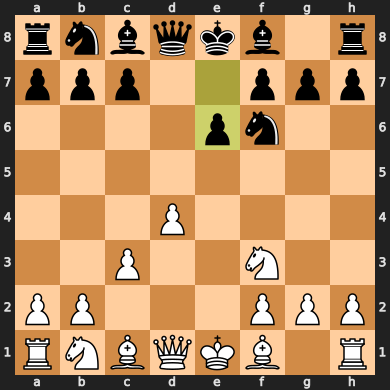

In [117]:
board